In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions/dataset.csv


In [2]:
import pandas as pd


# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/kaggle/input/co2-emissions/dataset.csv')

# Show the first few rows of the DataFrame
data.head()


,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [3]:
# Basic information about the dataset
num_entries = len(data)
num_countries = data['country'].nunique()
num_sectors = data['sector'].nunique()
date_range = (data['date'].min(), data['date'].max())

# Check for missing values
missing_values = data.isnull().sum()

num_entries, num_countries, num_sectors, date_range, missing_values


(135408,
 14,
 6,
 ('01/01/2019', '31/12/2022'),
 country      0
 date         0
 sector       0
 value        0
 timestamp    0
 dtype: int64)

In [4]:
# Unique countries and sectors in the dataset
unique_countries = data['country'].unique()
unique_sectors = data['sector'].unique()

unique_countries, unique_sectors


(array(['Brazil', 'China', 'EU27 & UK', 'France', 'Germany', 'India',
        'Italy', 'Japan', 'ROW', 'Russia', 'Spain', 'UK', 'US', 'WORLD'],
       dtype=object),
 array(['Power', 'Industry', 'Ground Transport', 'Residential',
        'Domestic Aviation', 'International Aviation'], dtype=object))

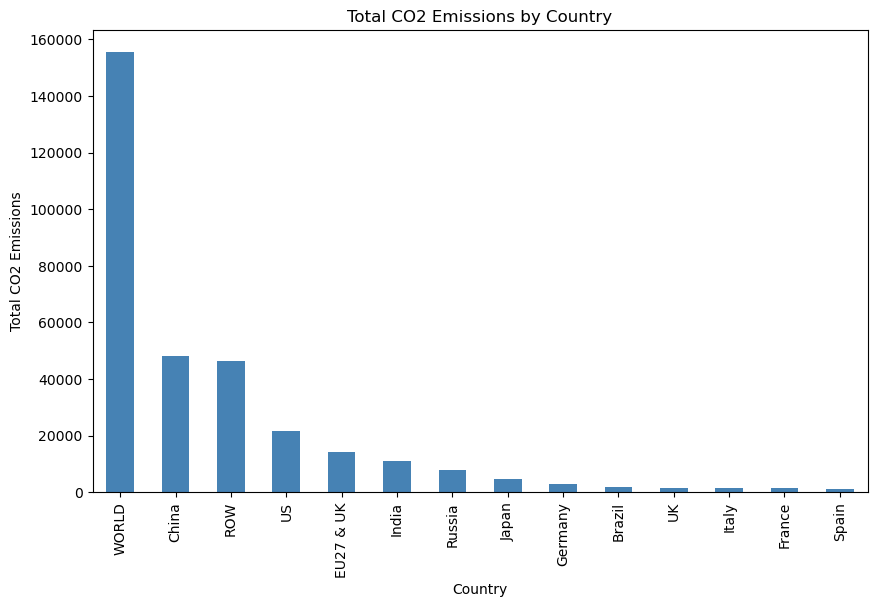

In [5]:
import matplotlib.pyplot as plt

# Aggregate total CO2 emissions by country
total_emissions_by_country = data.groupby('country')['value'].sum().sort_values(ascending=False)

# Plot total CO2 emissions by country
plt.figure(figsize=(10, 6))
total_emissions_by_country.plot(kind='bar', color='steelblue')
plt.title('Total CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.show()


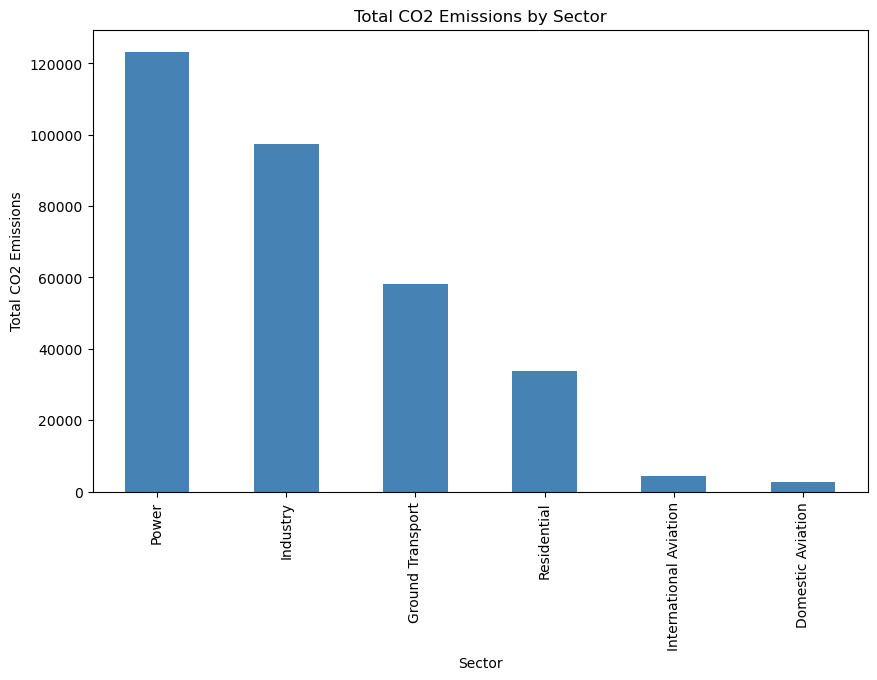

In [6]:
# Aggregate total CO2 emissions by sector
total_emissions_by_sector = data.groupby('sector')['value'].sum().sort_values(ascending=False)

# Plot total CO2 emissions by sector
plt.figure(figsize=(10, 6))
total_emissions_by_sector.plot(kind='bar', color='steelblue')
plt.title('Total CO2 Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('Total CO2 Emissions')
plt.show()


In [7]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Create a 'year' column for easy yearly aggregation
data['year'] = data['date'].dt.year

# Show the first few rows of the DataFrame to confirm changes
data.head()


,country,date,sector,value,timestamp,year
0,Brazil,2019-01-01,Power,0.096799,1546300800,2019
1,China,2019-01-01,Power,14.816100,1546300800,2019
2,EU27 & UK,2019-01-01,Power,1.886490,1546300800,2019
3,France,2019-01-01,Power,0.051217,1546300800,2019
4,Germany,2019-01-01,Power,0.315002,1546300800,2019


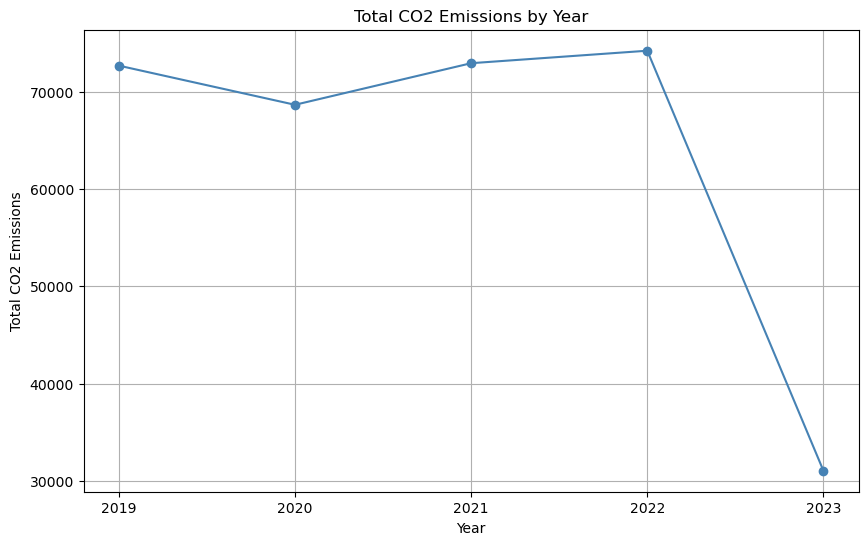

In [8]:
# Aggregate total CO2 emissions by year
total_emissions_by_year = data.groupby('year')['value'].sum()

# Plot total CO2 emissions by year
plt.figure(figsize=(10, 6))
total_emissions_by_year.plot(kind='line', marker='o', color='steelblue')
plt.title('Total CO2 Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.xticks(total_emissions_by_year.index)
plt.grid(True)
plt.show()


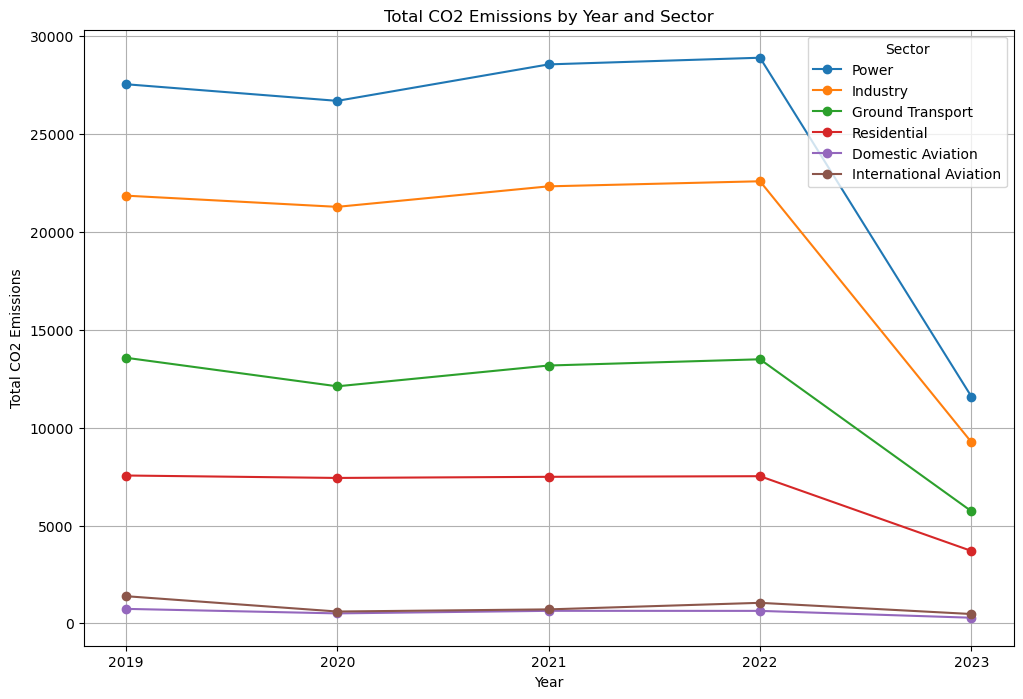

In [9]:
# Aggregate total CO2 emissions by year and sector
total_emissions_by_year_sector = data.groupby(['year', 'sector'])['value'].sum().unstack()

# Plot total CO2 emissions by year for each sector
plt.figure(figsize=(12, 8))

for sector in unique_sectors:
    plt.plot(total_emissions_by_year_sector.index, total_emissions_by_year_sector[sector], marker='o', label=sector)

plt.title('Total CO2 Emissions by Year and Sector')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.xticks(total_emissions_by_year_sector.index)
plt.legend(title='Sector')
plt.grid(True)
plt.show()


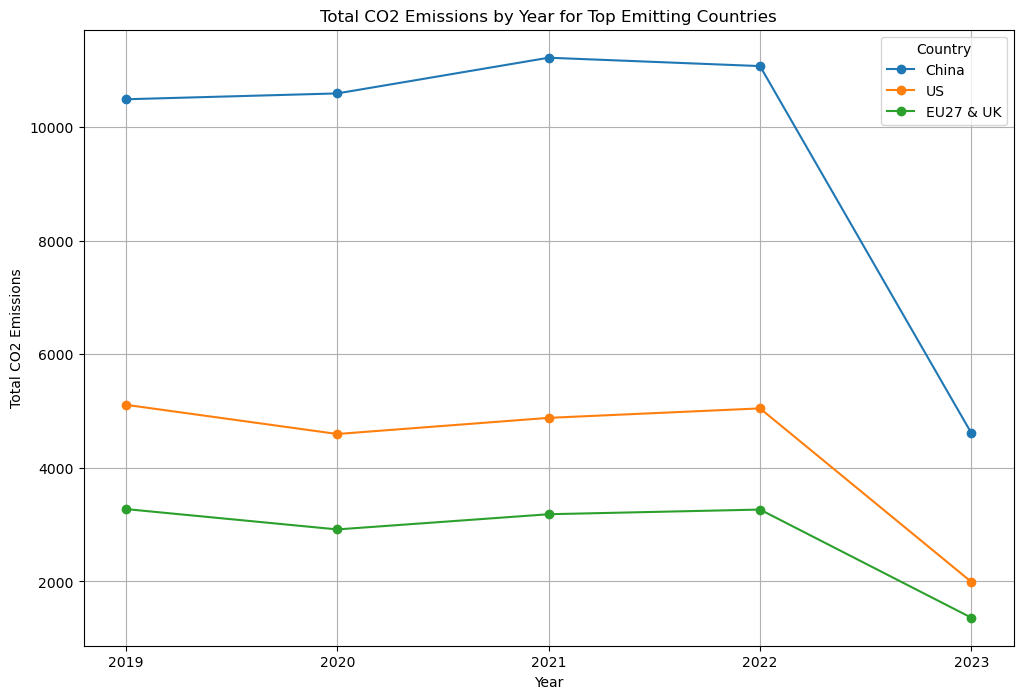

In [10]:
# Select the top emitting countries
top_countries = ['China', 'US', 'EU27 & UK']

# Aggregate total CO2 emissions by year and country for the top countries
total_emissions_by_year_country = data[data['country'].isin(top_countries)].groupby(['year', 'country'])['value'].sum().unstack()

# Plot total CO2 emissions by year for each top country
plt.figure(figsize=(12, 8))

for country in top_countries:
    plt.plot(total_emissions_by_year_country.index, total_emissions_by_year_country[country], marker='o', label=country)

plt.title('Total CO2 Emissions by Year for Top Emitting Countries')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.xticks(total_emissions_by_year_country.index)
plt.legend(title='Country')
plt.grid(True)
plt.show()


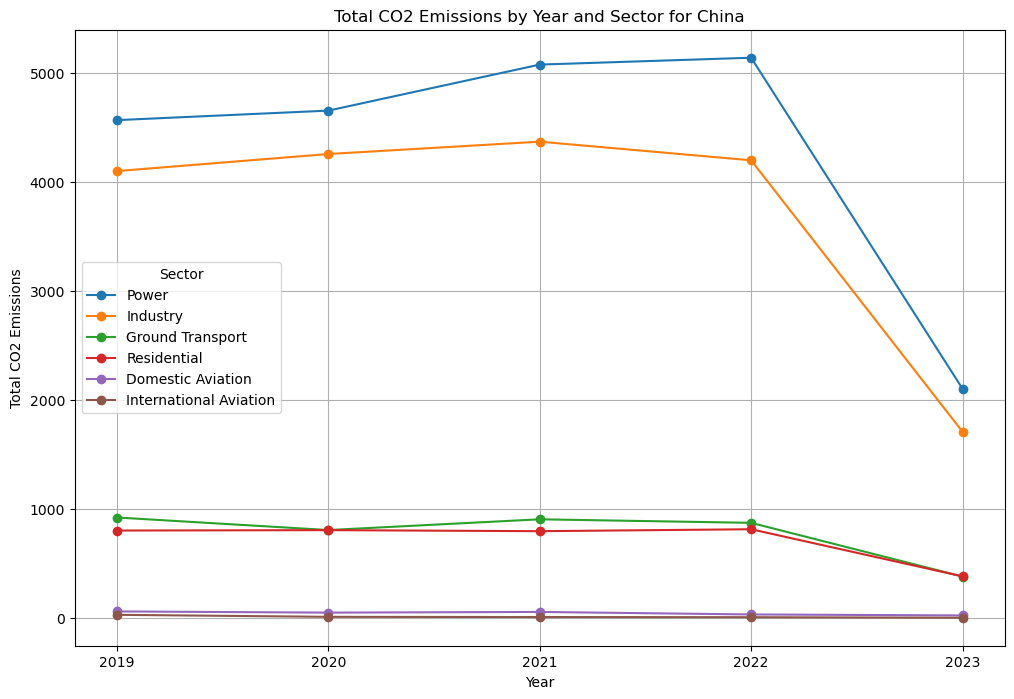

In [11]:
# Aggregate total CO2 emissions by year, sector, and country for China
total_emissions_by_year_sector_china = data[data['country'] == 'China'].groupby(['year', 'sector'])['value'].sum().unstack()

# Plot total CO2 emissions by year for each sector in China
plt.figure(figsize=(12, 8))

for sector in unique_sectors:
    plt.plot(total_emissions_by_year_sector_china.index, total_emissions_by_year_sector_china[sector], marker='o', label=sector)

plt.title('Total CO2 Emissions by Year and Sector for China')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.xticks(total_emissions_by_year_sector_china.index)
plt.legend(title='Sector')
plt.grid(True)
plt.show()


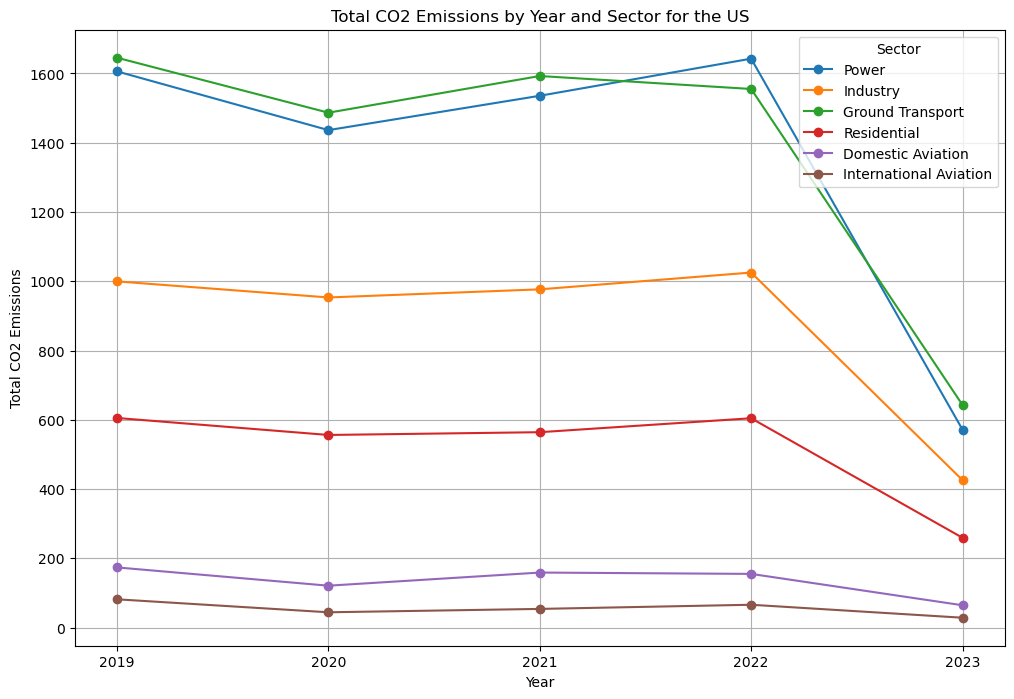

In [12]:
# Aggregate total CO2 emissions by year, sector, and country for the US
total_emissions_by_year_sector_us = data[data['country'] == 'US'].groupby(['year', 'sector'])['value'].sum().unstack()

# Plot total CO2 emissions by year for each sector in the US
plt.figure(figsize=(12, 8))

for sector in unique_sectors:
    plt.plot(total_emissions_by_year_sector_us.index, total_emissions_by_year_sector_us[sector], marker='o', label=sector)

plt.title('Total CO2 Emissions by Year and Sector for the US')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.xticks(total_emissions_by_year_sector_us.index)
plt.legend(title='Sector')
plt.grid(True)
plt.show()


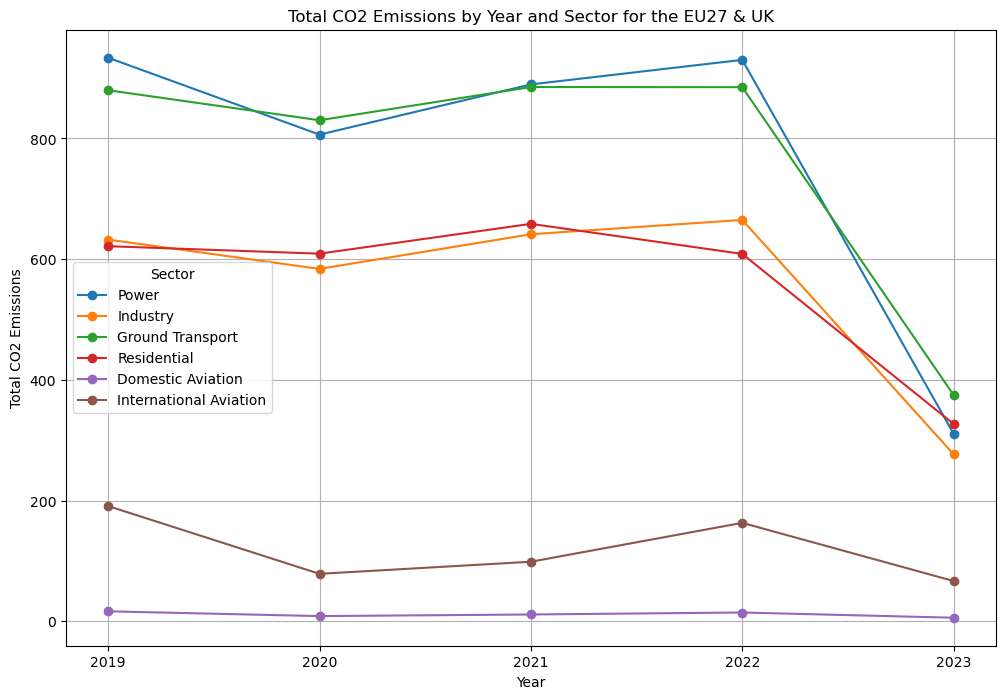

In [13]:
# Aggregate total CO2 emissions by year, sector, and country for the EU27 & UK
total_emissions_by_year_sector_eu27_uk = data[data['country'] == 'EU27 & UK'].groupby(['year', 'sector'])['value'].sum().unstack()

# Plot total CO2 emissions by year for each sector in the EU27 & UK
plt.figure(figsize=(12, 8))

for sector in unique_sectors:
    plt.plot(total_emissions_by_year_sector_eu27_uk.index, total_emissions_by_year_sector_eu27_uk[sector], marker='o', label=sector)

plt.title('Total CO2 Emissions by Year and Sector for the EU27 & UK')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.xticks(total_emissions_by_year_sector_eu27_uk.index)
plt.legend(title='Sector')
plt.grid(True)
plt.show()


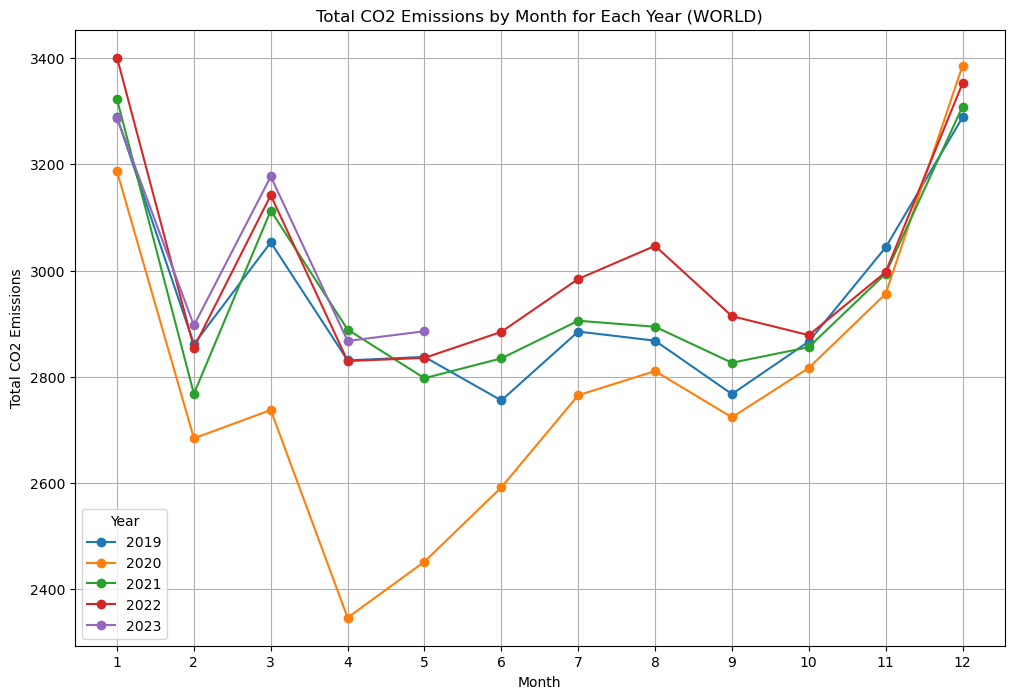

In [14]:
# Create a 'month' column for easy monthly aggregation
data['month'] = data['date'].dt.month

# Aggregate total CO2 emissions by year and month for the 'WORLD' category
total_emissions_by_year_month_world = data[data['country'] == 'WORLD'].groupby(['year', 'month'])['value'].sum().unstack()

# Plot total CO2 emissions by month for each year for the 'WORLD' category
plt.figure(figsize=(12, 8))

for year in total_emissions_by_year_month_world.index:
    plt.plot(total_emissions_by_year_month_world.columns, total_emissions_by_year_month_world.loc[year], marker='o', label=year)

plt.title('Total CO2 Emissions by Month for Each Year (WORLD)')
plt.xlabel('Month')
plt.ylabel('Total CO2 Emissions')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()


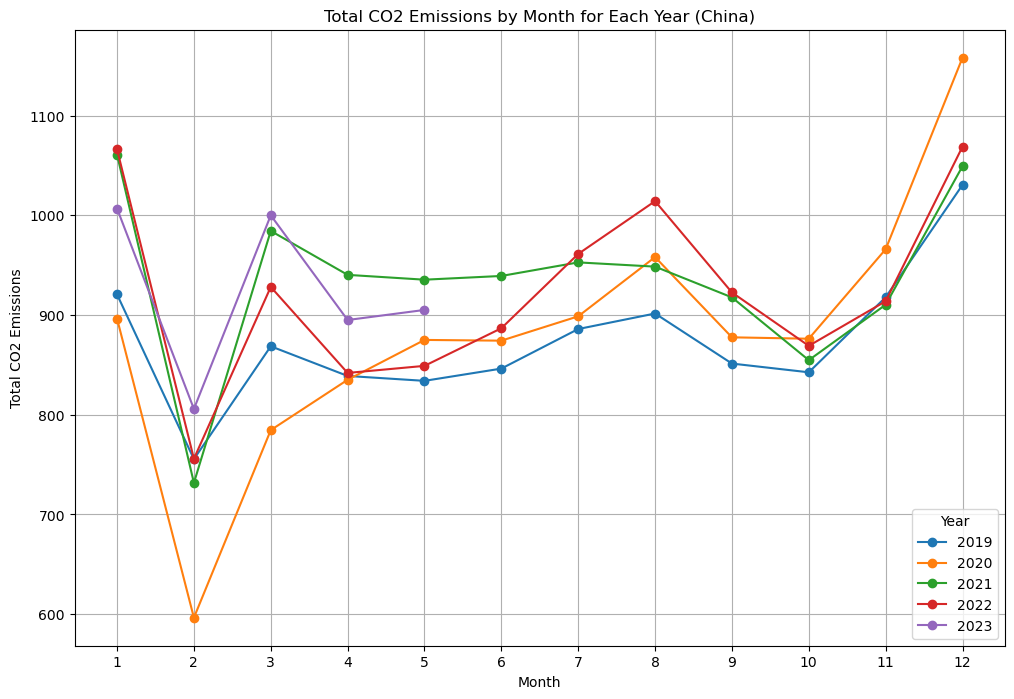

In [15]:
# Aggregate total CO2 emissions by year and month for China
total_emissions_by_year_month_china = data[data['country'] == 'China'].groupby(['year', 'month'])['value'].sum().unstack()

# Plot total CO2 emissions by month for each year for China
plt.figure(figsize=(12, 8))

for year in total_emissions_by_year_month_china.index:
    plt.plot(total_emissions_by_year_month_china.columns, total_emissions_by_year_month_china.loc[year], marker='o', label=year)

plt.title('Total CO2 Emissions by Month for Each Year (China)')
plt.xlabel('Month')
plt.ylabel('Total CO2 Emissions')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()


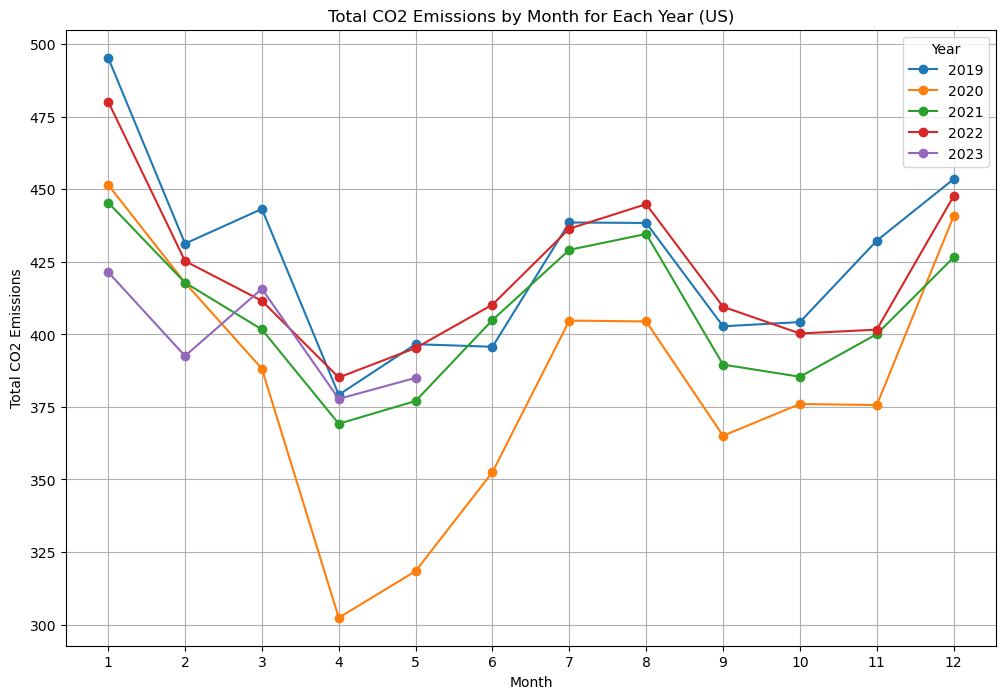

In [16]:
# Aggregate total CO2 emissions by year and month for the US
total_emissions_by_year_month_us = data[data['country'] == 'US'].groupby(['year', 'month'])['value'].sum().unstack()

# Plot total CO2 emissions by month for each year for the US
plt.figure(figsize=(12, 8))

for year in total_emissions_by_year_month_us.index:
    plt.plot(total_emissions_by_year_month_us.columns, total_emissions_by_year_month_us.loc[year], marker='o', label=year)

plt.title('Total CO2 Emissions by Month for Each Year (US)')
plt.xlabel('Month')
plt.ylabel('Total CO2 Emissions')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()


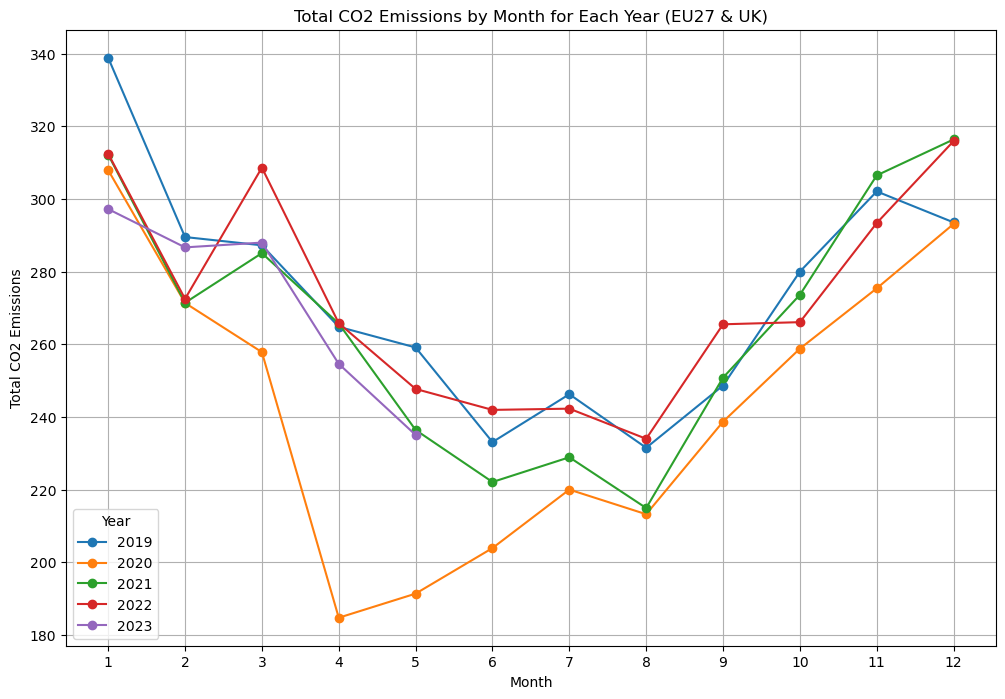

In [17]:
# Aggregate total CO2 emissions by year and month for the EU27 & UK
total_emissions_by_year_month_eu27_uk = data[data['country'] == 'EU27 & UK'].groupby(['year', 'month'])['value'].sum().unstack()

# Plot total CO2 emissions by month for each year for the EU27 & UK
plt.figure(figsize=(12, 8))

for year in total_emissions_by_year_month_eu27_uk.index:
    plt.plot(total_emissions_by_year_month_eu27_uk.columns, total_emissions_by_year_month_eu27_uk.loc[year], marker='o', label=year)

plt.title('Total CO2 Emissions by Month for Each Year (EU27 & UK)')
plt.xlabel('Month')
plt.ylabel('Total CO2 Emissions')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()


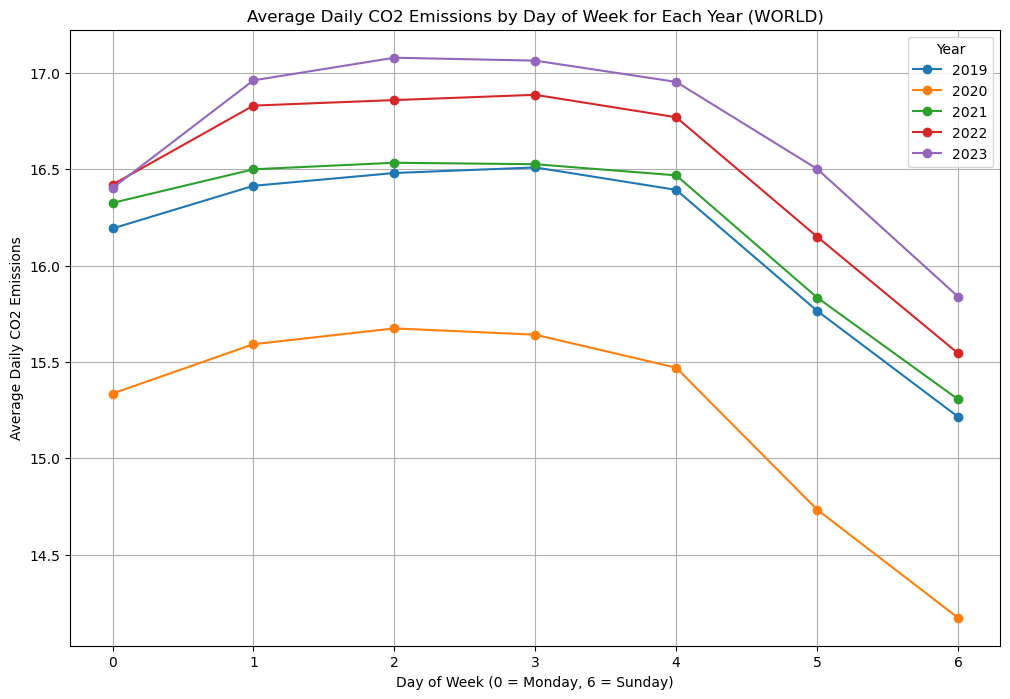

In [18]:
# Create a 'day_of_week' column (0 = Monday, 6 = Sunday)
data['day_of_week'] = data['date'].dt.dayofweek

# Aggregate average daily CO2 emissions by day of week and year for the 'WORLD' category
average_daily_emissions_by_day_of_week_world = data[data['country'] == 'WORLD'].groupby(['year', 'day_of_week'])['value'].mean().unstack()

# Plot average daily CO2 emissions by day of week for each year for the 'WORLD' category
plt.figure(figsize=(12, 8))

for year in average_daily_emissions_by_day_of_week_world.index:
    plt.plot(average_daily_emissions_by_day_of_week_world.columns, average_daily_emissions_by_day_of_week_world.loc[year], marker='o', label=year)

plt.title('Average Daily CO2 Emissions by Day of Week for Each Year (WORLD)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Daily CO2 Emissions')
plt.xticks(range(7))
plt.legend(title='Year')
plt.grid(True)
plt.show()


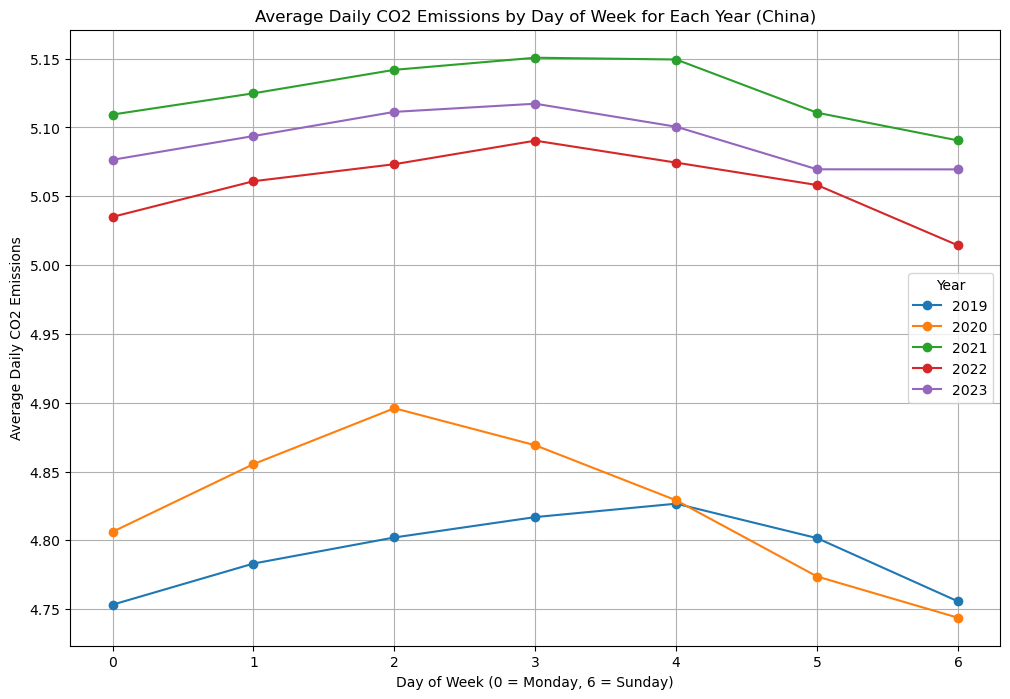

In [19]:
# Aggregate average daily CO2 emissions by day of week and year for China
average_daily_emissions_by_day_of_week_china = data[data['country'] == 'China'].groupby(['year', 'day_of_week'])['value'].mean().unstack()

# Plot average daily CO2 emissions by day of week for each year for China
plt.figure(figsize=(12, 8))

for year in average_daily_emissions_by_day_of_week_china.index:
    plt.plot(average_daily_emissions_by_day_of_week_china.columns, average_daily_emissions_by_day_of_week_china.loc[year], marker='o', label=year)

plt.title('Average Daily CO2 Emissions by Day of Week for Each Year (China)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Daily CO2 Emissions')
plt.xticks(range(7))
plt.legend(title='Year')
plt.grid(True)
plt.show()


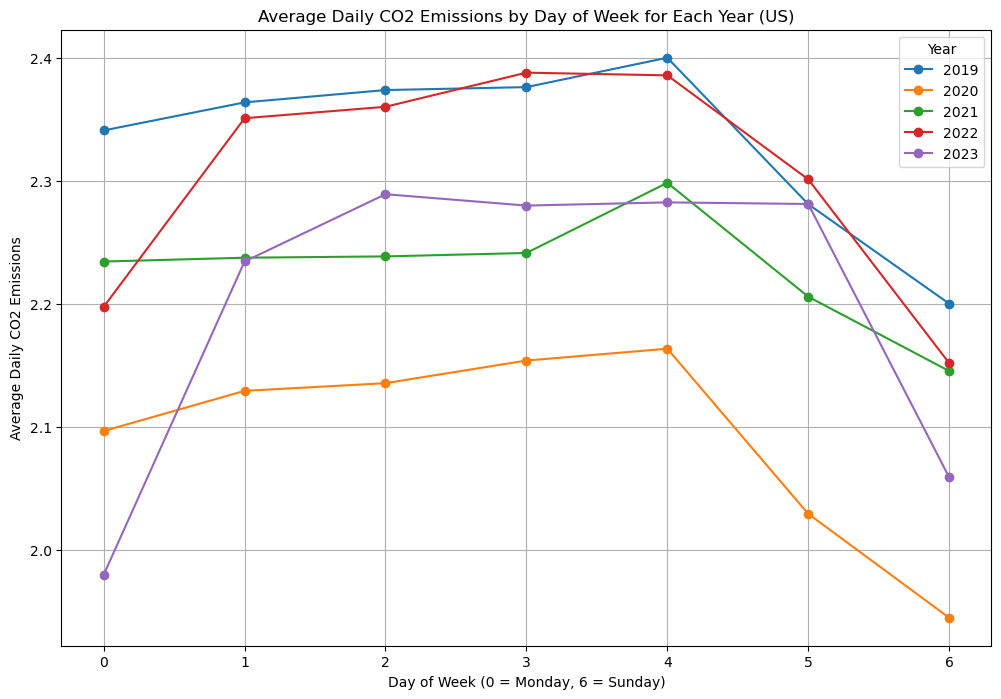

In [20]:
# Aggregate average daily CO2 emissions by day of week and year for the US
average_daily_emissions_by_day_of_week_us = data[data['country'] == 'US'].groupby(['year', 'day_of_week'])['value'].mean().unstack()

# Plot average daily CO2 emissions by day of week for each year for the US
plt.figure(figsize=(12, 8))

for year in average_daily_emissions_by_day_of_week_us.index:
    plt.plot(average_daily_emissions_by_day_of_week_us.columns, average_daily_emissions_by_day_of_week_us.loc[year], marker='o', label=year)

plt.title('Average Daily CO2 Emissions by Day of Week for Each Year (US)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Daily CO2 Emissions')
plt.xticks(range(7))
plt.legend(title='Year')
plt.grid(True)
plt.show()


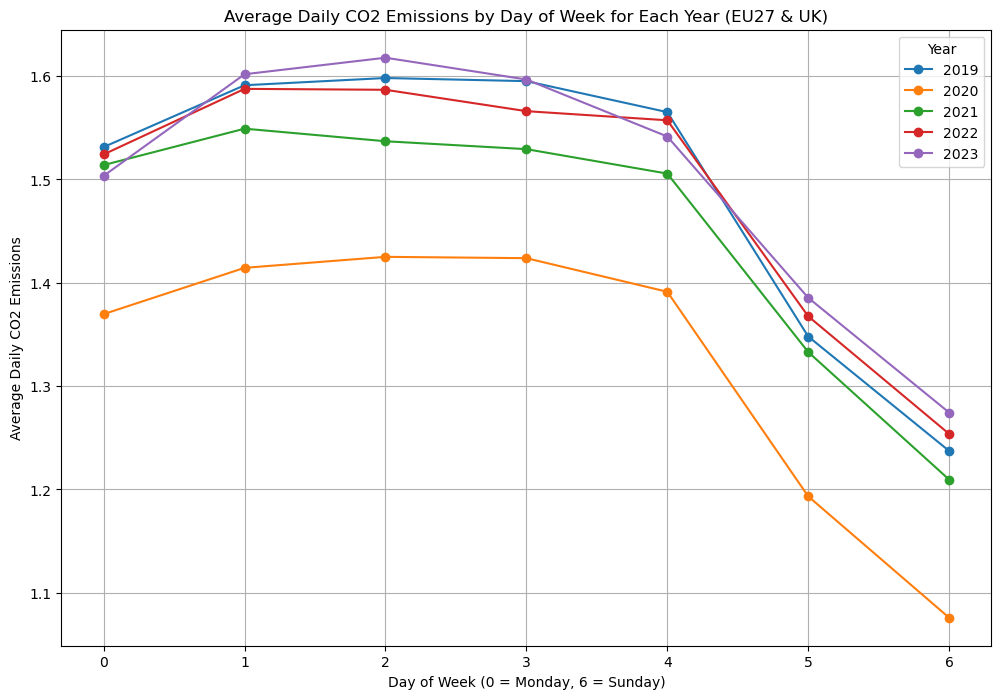

In [21]:
# Aggregate average daily CO2 emissions by day of week and year for the EU27 & UK
average_daily_emissions_by_day_of_week_eu27_uk = data[data['country'] == 'EU27 & UK'].groupby(['year', 'day_of_week'])['value'].mean().unstack()

# Plot average daily CO2 emissions by day of week for each year for the EU27 & UK
plt.figure(figsize=(12, 8))

for year in average_daily_emissions_by_day_of_week_eu27_uk.index:
    plt.plot(average_daily_emissions_by_day_of_week_eu27_uk.columns, average_daily_emissions_by_day_of_week_eu27_uk.loc[year], marker='o', label=year)

plt.title('Average Daily CO2 Emissions by Day of Week for Each Year (EU27 & UK)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Daily CO2 Emissions')
plt.xticks(range(7))
plt.legend(title='Year')
plt.grid(True)
plt.show()


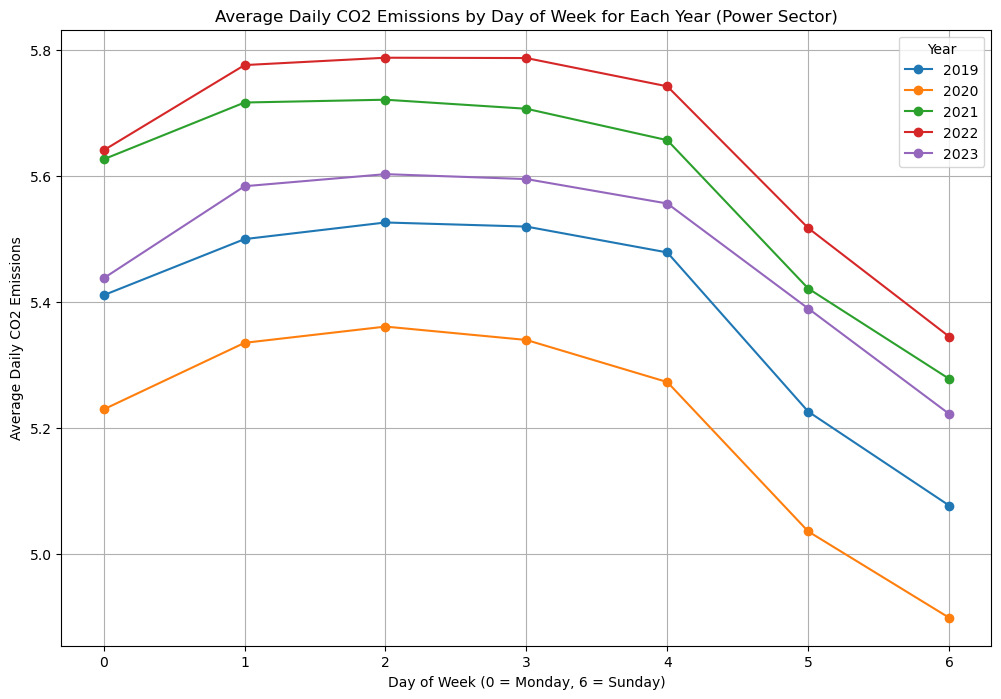

In [22]:
# Aggregate average daily CO2 emissions by day of week and year for the Power sector
average_daily_emissions_by_day_of_week_power = data[data['sector'] == 'Power'].groupby(['year', 'day_of_week'])['value'].mean().unstack()

# Plot average daily CO2 emissions by day of week for each year for the Power sector
plt.figure(figsize=(12, 8))

for year in average_daily_emissions_by_day_of_week_power.index:
    plt.plot(average_daily_emissions_by_day_of_week_power.columns, average_daily_emissions_by_day_of_week_power.loc[year], marker='o', label=year)

plt.title('Average Daily CO2 Emissions by Day of Week for Each Year (Power Sector)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Daily CO2 Emissions')
plt.xticks(range(7))
plt.legend(title='Year')
plt.grid(True)
plt.show()


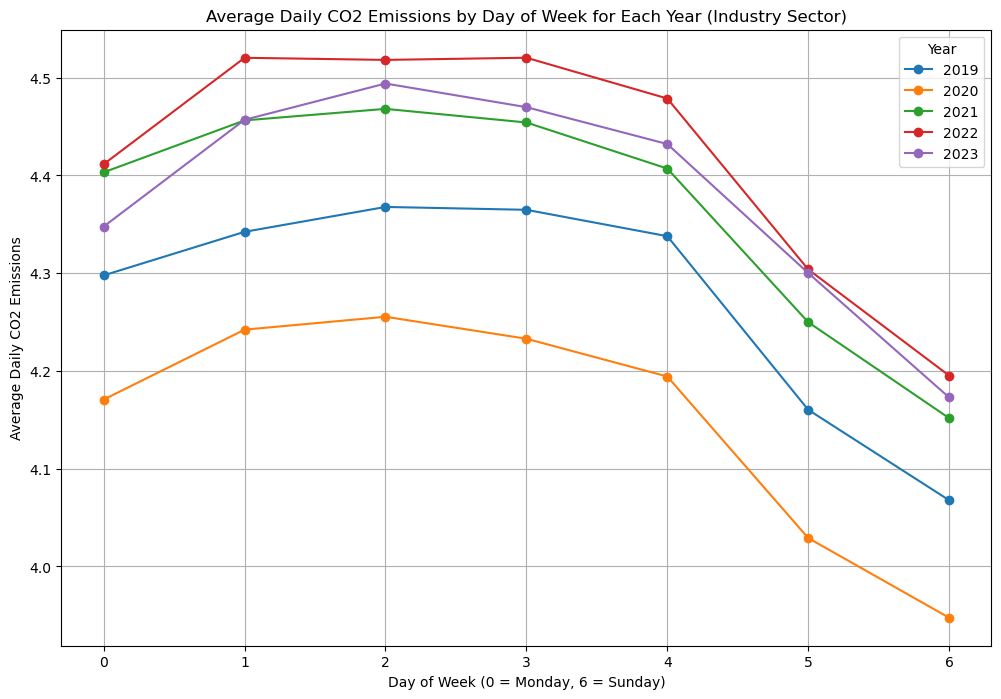

In [23]:
# Aggregate average daily CO2 emissions by day of week and year for the Industry sector
average_daily_emissions_by_day_of_week_industry = data[data['sector'] == 'Industry'].groupby(['year', 'day_of_week'])['value'].mean().unstack()

# Plot average daily CO2 emissions by day of week for each year for the Industry sector
plt.figure(figsize=(12, 8))

for year in average_daily_emissions_by_day_of_week_industry.index:
    plt.plot(average_daily_emissions_by_day_of_week_industry.columns, average_daily_emissions_by_day_of_week_industry.loc[year], marker='o', label=year)

plt.title('Average Daily CO2 Emissions by Day of Week for Each Year (Industry Sector)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Daily CO2 Emissions')
plt.xticks(range(7))
plt.legend(title='Year')
plt.grid(True)
plt.show()


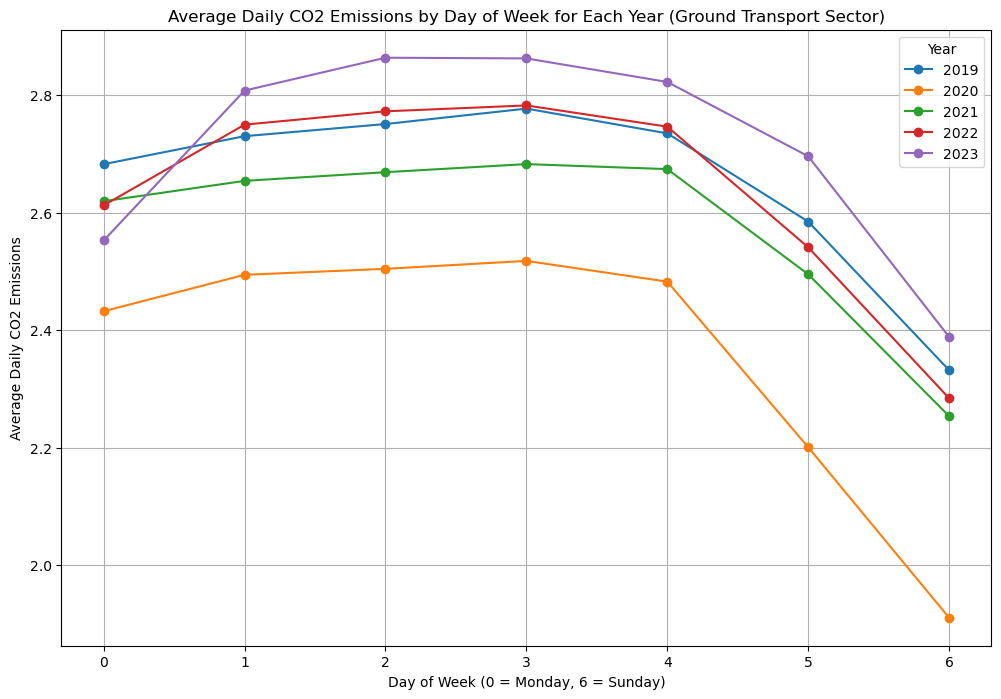

In [24]:
# Aggregate average daily CO2 emissions by day of week and year for the Ground Transport sector
average_daily_emissions_by_day_of_week_ground_transport = data[data['sector'] == 'Ground Transport'].groupby(['year', 'day_of_week'])['value'].mean().unstack()

# Plot average daily CO2 emissions by day of week for each year for the Ground Transport sector
plt.figure(figsize=(12, 8))

for year in average_daily_emissions_by_day_of_week_ground_transport.index:
    plt.plot(average_daily_emissions_by_day_of_week_ground_transport.columns, average_daily_emissions_by_day_of_week_ground_transport.loc[year], marker='o', label=year)

plt.title('Average Daily CO2 Emissions by Day of Week for Each Year (Ground Transport Sector)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Daily CO2 Emissions')
plt.xticks(range(7))
plt.legend(title='Year')
plt.grid(True)
plt.show()


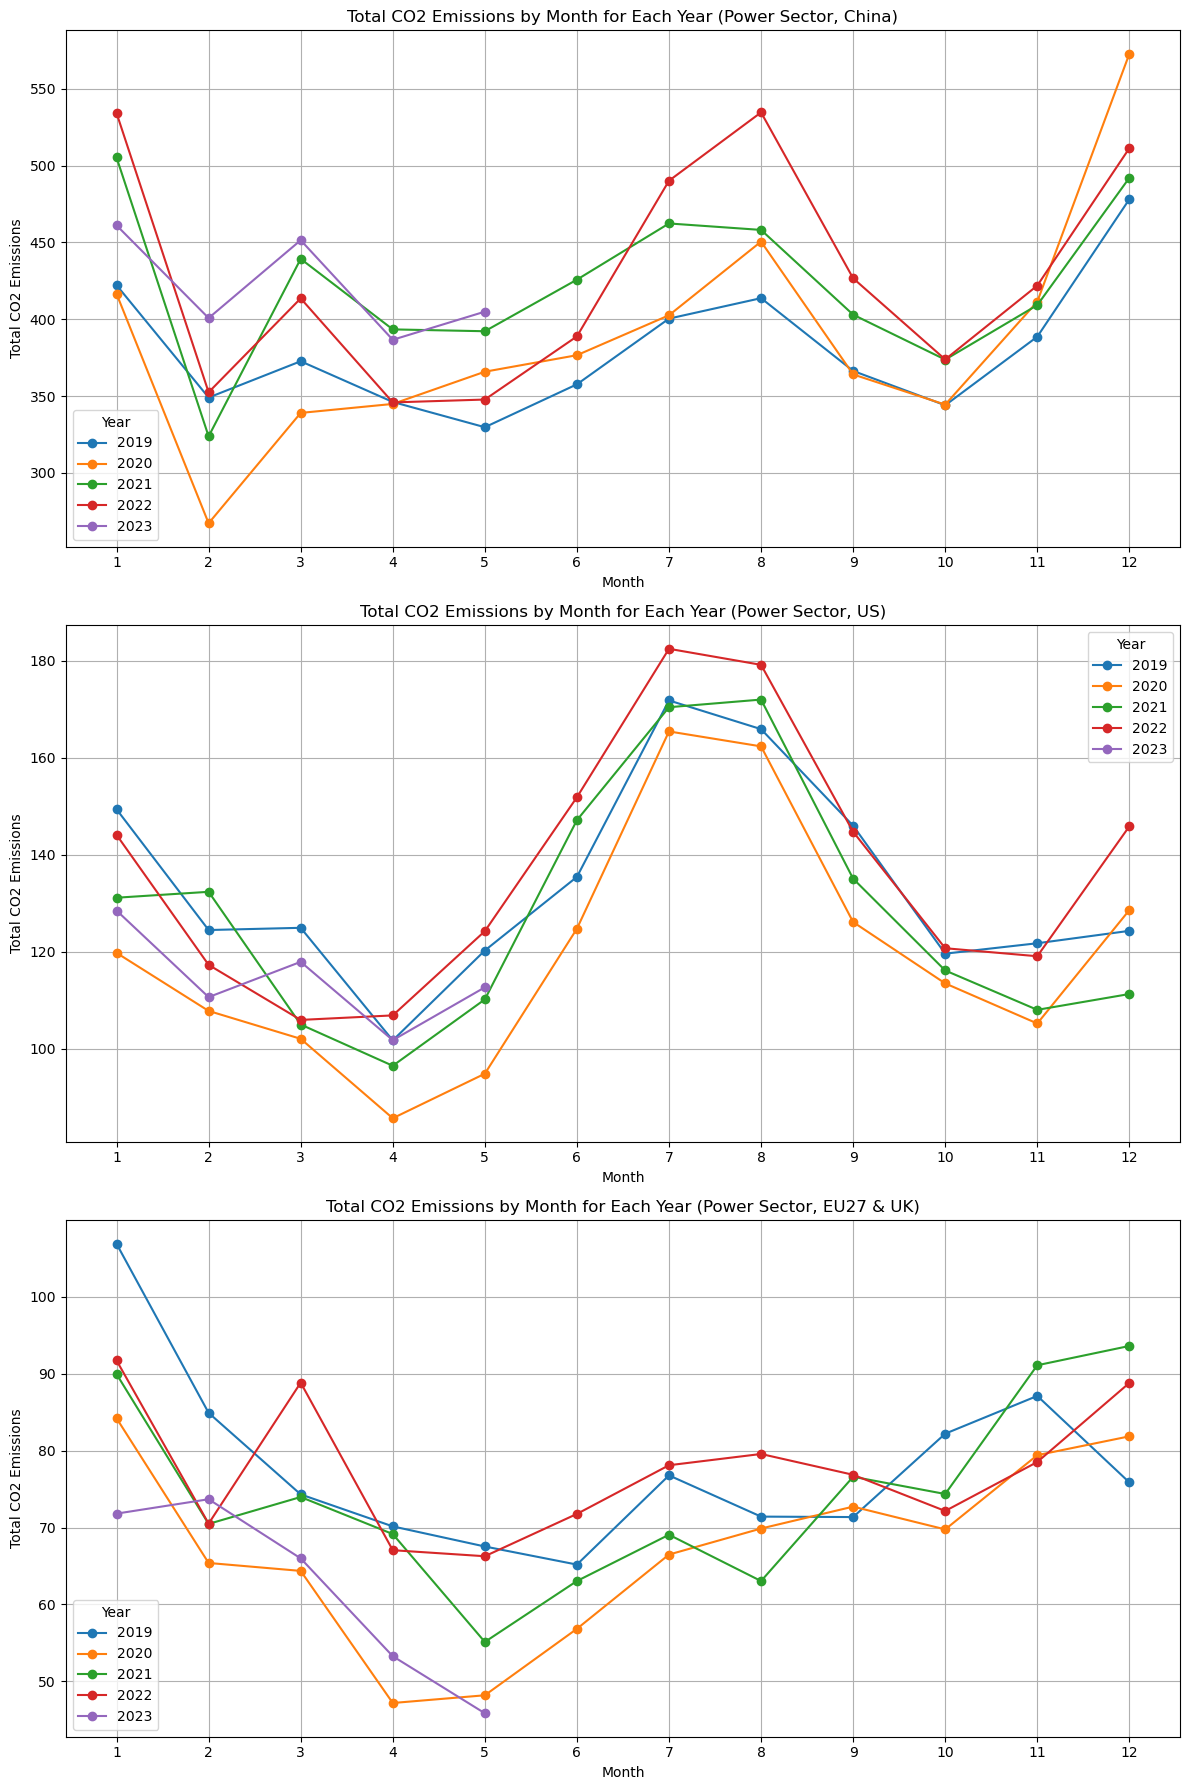

In [25]:
# Aggregate total CO2 emissions by year, month, and country for the Power sector
total_emissions_by_year_month_power = data[data['sector'] == 'Power'].groupby(['year', 'month', 'country'])['value'].sum().unstack()

# Separate DataFrames for each top country
total_emissions_by_year_month_power_china = total_emissions_by_year_month_power['China'].unstack()
total_emissions_by_year_month_power_us = total_emissions_by_year_month_power['US'].unstack()
total_emissions_by_year_month_power_eu27_uk = total_emissions_by_year_month_power['EU27 & UK'].unstack()

# Plot total CO2 emissions by month for each year for each top country in the Power sector
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# China
for year in total_emissions_by_year_month_power_china.index:
    axs[0].plot(total_emissions_by_year_month_power_china.columns, total_emissions_by_year_month_power_china.loc[year], marker='o', label=year)
axs[0].set_title('Total CO2 Emissions by Month for Each Year (Power Sector, China)')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total CO2 Emissions')
axs[0].set_xticks(range(1, 13))
axs[0].legend(title='Year')
axs[0].grid(True)

# US
for year in total_emissions_by_year_month_power_us.index:
    axs[1].plot(total_emissions_by_year_month_power_us.columns, total_emissions_by_year_month_power_us.loc[year], marker='o', label=year)
axs[1].set_title('Total CO2 Emissions by Month for Each Year (Power Sector, US)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total CO2 Emissions')
axs[1].set_xticks(range(1, 13))
axs[1].legend(title='Year')
axs[1].grid(True)

# EU27 & UK
for year in total_emissions_by_year_month_power_eu27_uk.index:
    axs[2].plot(total_emissions_by_year_month_power_eu27_uk.columns, total_emissions_by_year_month_power_eu27_uk.loc[year], marker='o', label=year)
axs[2].set_title('Total CO2 Emissions by Month for Each Year (Power Sector, EU27 & UK)')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Total CO2 Emissions')
axs[2].set_xticks(range(1, 13))
axs[2].legend(title='Year')
axs[2].grid(True)

plt.tight_layout()
plt.show()


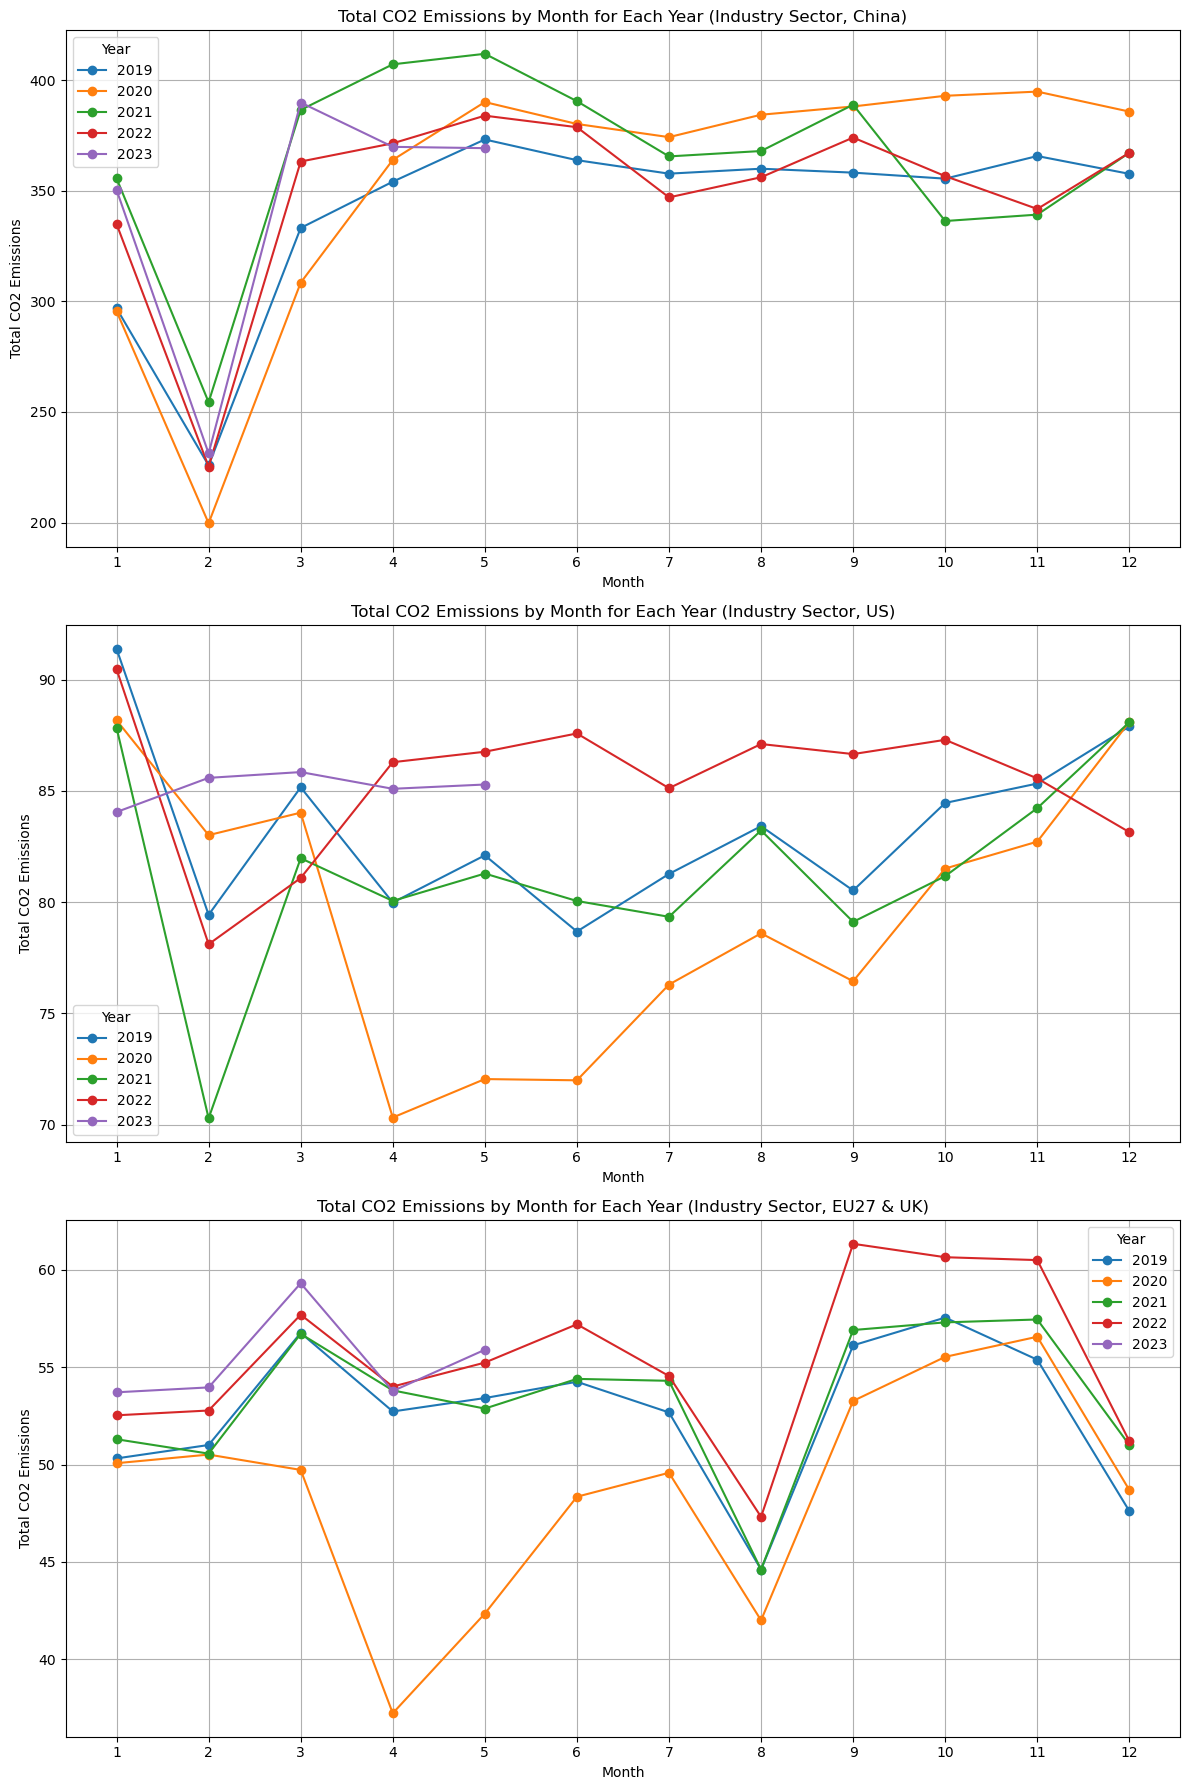

In [26]:
# Aggregate total CO2 emissions by year, month, and country for the Industry sector
total_emissions_by_year_month_industry = data[data['sector'] == 'Industry'].groupby(['year', 'month', 'country'])['value'].sum().unstack()

# Separate DataFrames for each top country
total_emissions_by_year_month_industry_china = total_emissions_by_year_month_industry['China'].unstack()
total_emissions_by_year_month_industry_us = total_emissions_by_year_month_industry['US'].unstack()
total_emissions_by_year_month_industry_eu27_uk = total_emissions_by_year_month_industry['EU27 & UK'].unstack()

# Plot total CO2 emissions by month for each year for each top country in the Industry sector
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# China
for year in total_emissions_by_year_month_industry_china.index:
    axs[0].plot(total_emissions_by_year_month_industry_china.columns, total_emissions_by_year_month_industry_china.loc[year], marker='o', label=year)
axs[0].set_title('Total CO2 Emissions by Month for Each Year (Industry Sector, China)')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total CO2 Emissions')
axs[0].set_xticks(range(1, 13))
axs[0].legend(title='Year')
axs[0].grid(True)

# US
for year in total_emissions_by_year_month_industry_us.index:
    axs[1].plot(total_emissions_by_year_month_industry_us.columns, total_emissions_by_year_month_industry_us.loc[year], marker='o', label=year)
axs[1].set_title('Total CO2 Emissions by Month for Each Year (Industry Sector, US)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total CO2 Emissions')
axs[1].set_xticks(range(1, 13))
axs[1].legend(title='Year')
axs[1].grid(True)

# EU27 & UK
for year in total_emissions_by_year_month_industry_eu27_uk.index:
    axs[2].plot(total_emissions_by_year_month_industry_eu27_uk.columns, total_emissions_by_year_month_industry_eu27_uk.loc[year], marker='o', label=year)
axs[2].set_title('Total CO2 Emissions by Month for Each Year (Industry Sector, EU27 & UK)')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Total CO2 Emissions')
axs[2].set_xticks(range(1, 13))
axs[2].legend(title='Year')
axs[2].grid(True)

plt.tight_layout()
plt.show()


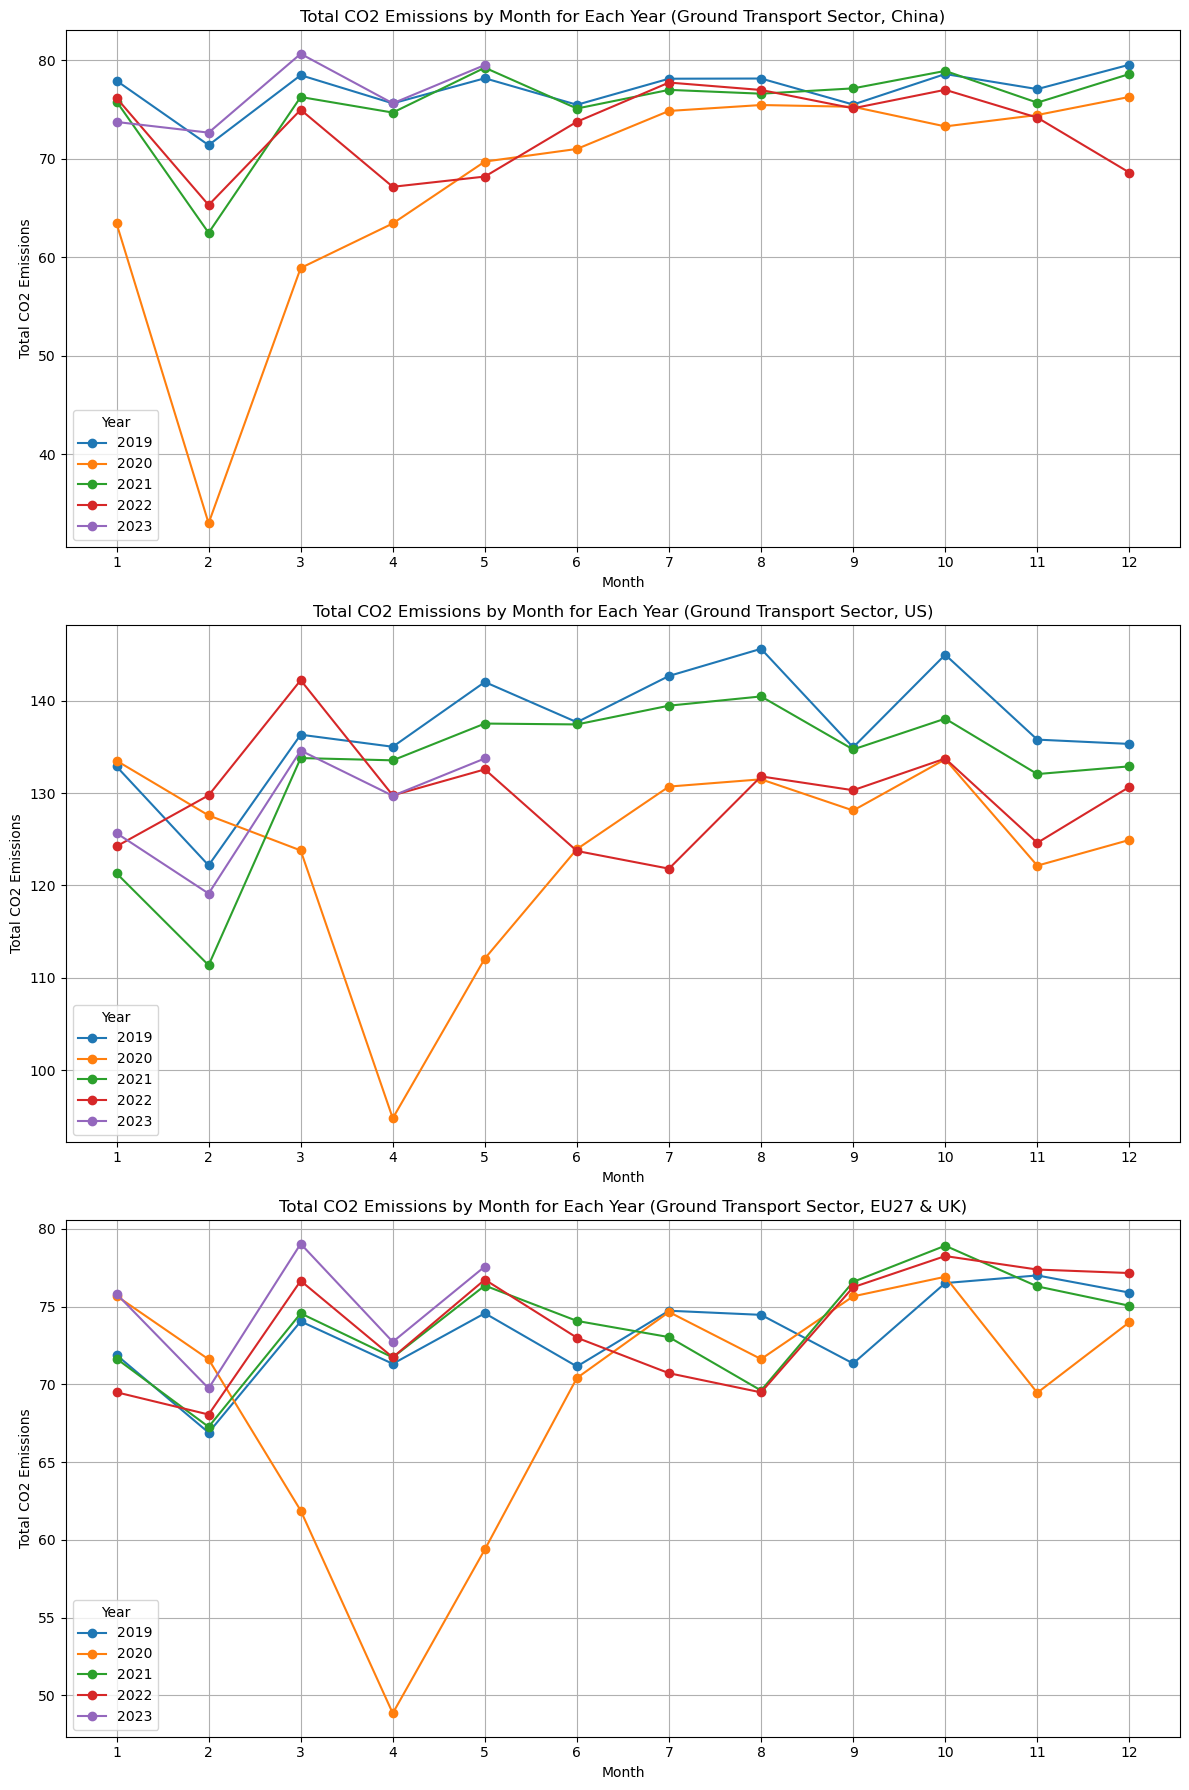

In [27]:
# Aggregate total CO2 emissions by year, month, and country for the Ground Transport sector
total_emissions_by_year_month_ground_transport = data[data['sector'] == 'Ground Transport'].groupby(['year', 'month', 'country'])['value'].sum().unstack()

# Separate DataFrames for each top country
total_emissions_by_year_month_ground_transport_china = total_emissions_by_year_month_ground_transport['China'].unstack()
total_emissions_by_year_month_ground_transport_us = total_emissions_by_year_month_ground_transport['US'].unstack()
total_emissions_by_year_month_ground_transport_eu27_uk = total_emissions_by_year_month_ground_transport['EU27 & UK'].unstack()

# Plot total CO2 emissions by month for each year for each top country in the Ground Transport sector
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# China
for year in total_emissions_by_year_month_ground_transport_china.index:
    axs[0].plot(total_emissions_by_year_month_ground_transport_china.columns, total_emissions_by_year_month_ground_transport_china.loc[year], marker='o', label=year)
axs[0].set_title('Total CO2 Emissions by Month for Each Year (Ground Transport Sector, China)')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total CO2 Emissions')
axs[0].set_xticks(range(1, 13))
axs[0].legend(title='Year')
axs[0].grid(True)

# US
for year in total_emissions_by_year_month_ground_transport_us.index:
    axs[1].plot(total_emissions_by_year_month_ground_transport_us.columns, total_emissions_by_year_month_ground_transport_us.loc[year], marker='o', label=year)
axs[1].set_title('Total CO2 Emissions by Month for Each Year (Ground Transport Sector, US)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total CO2 Emissions')
axs[1].set_xticks(range(1, 13))
axs[1].legend(title='Year')
axs[1].grid(True)

# EU27 & UK
for year in total_emissions_by_year_month_ground_transport_eu27_uk.index:
    axs[2].plot(total_emissions_by_year_month_ground_transport_eu27_uk.columns, total_emissions_by_year_month_ground_transport_eu27_uk.loc[year], marker='o', label=year)
axs[2].set_title('Total CO2 Emissions by Month for Each Year (Ground Transport Sector, EU27 & UK)')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Total CO2 Emissions')
axs[2].set_xticks(range(1, 13))
axs[2].legend(title='Year')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Create a dataset that contains only the CO2 emissions from the Power sector in China
power_china_data = data[(data['country'] == 'China') & (data['sector'] == 'Power')]

# Resample the data to get total monthly emissions
monthly_emissions = power_china_data.resample('M', on='date')['value'].sum()

# Fit an ARIMA model
model = ARIMA(monthly_emissions, order=(2, 1, 2))
model_fit = model.fit()

# Make predictions for the next year
predictions = model_fit.predict(start=len(monthly_emissions), end=len(monthly_emissions) + 12)

predictions


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2023-06-30    438.005249
2023-07-31    445.132732
2023-08-31    433.704539
2023-09-30    424.477768
2023-10-31    424.903941
2023-11-30    429.355228
2023-12-31    431.481291
2024-01-31    430.549838
2024-02-29    429.089607
2024-03-31    428.755005
2024-04-30    429.249794
2024-05-31    429.661195
2024-06-30    429.648962
Freq: M, Name: predicted_mean, dtype: float64

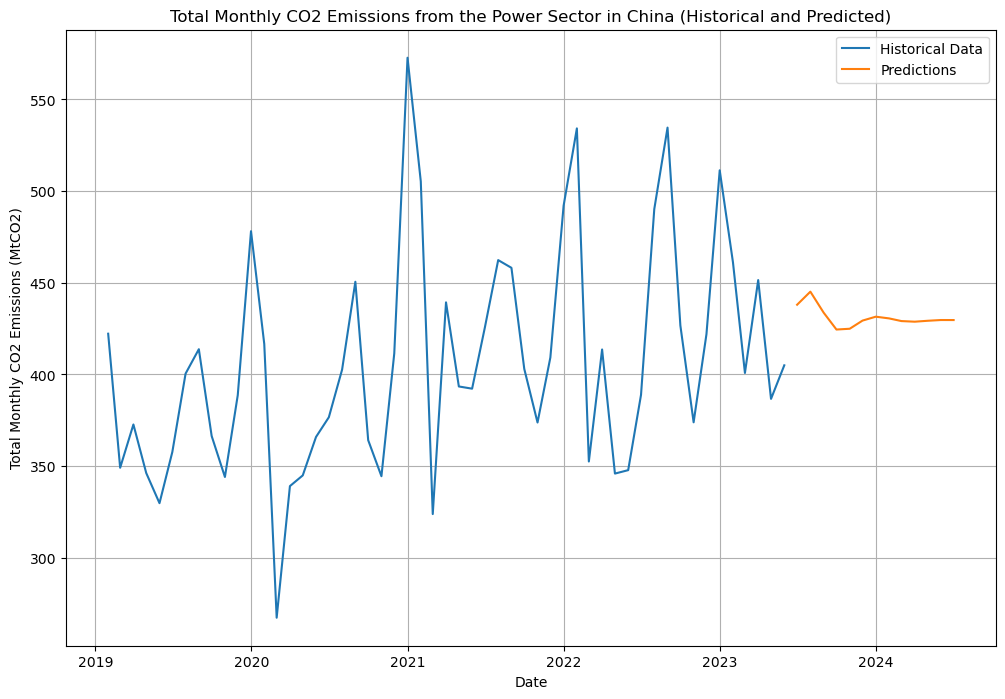

In [29]:
# Plot historical data and predictions
plt.figure(figsize=(12, 8))

# Plot historical data
plt.plot(monthly_emissions.index, monthly_emissions.values, label='Historical Data')

# Plot predictions
plt.plot(predictions.index, predictions.values, label='Predictions')

plt.title('Total Monthly CO2 Emissions from the Power Sector in China (Historical and Predicted)')
plt.xlabel('Date')
plt.ylabel('Total Monthly CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()
